In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from bs4 import BeautifulSoup as BS
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# ZILLOW WEBSCRAPE

In [2]:
zip_code = 37013
base_url = 'https://www.nashvillesmls.com/nashville-area-zip-codes/37013-real-estate.php'
#url = base_url.replace('{zip_code}', str(page_number))
response = requests.get(base_url)

In [3]:
type(response)

requests.models.Response

In [4]:
response.status_code

200

In [5]:
soup = BS(response.text)

In [6]:
blurb = soup.find('p', class_="gh-cta-stats")
blurb

<p class="gh-cta-stats"><strong>Zip Code 37013 real estate market statistics:</strong> As of <strong>December 12, 2024</strong> there are <strong>192</strong> active properties for sale in Zip Code 37013 with an average listing price of <strong>$457,056</strong>. The highest-priced property listing is <strong>$3,500,000</strong>, while the lowest priced property can be purchased for <strong>$225,000</strong>. Properties in Zip Code 37013 have an average price of <strong>$247 per square foot</strong>, based on listings with an average of <strong>3.2 bedrooms, 2.4 bathrooms</strong>, and <strong>1,895 square feet</strong> of living space.</p>

In [7]:
strong_tag = blurb.findAll('strong')
strong_tag

[<strong>Zip Code 37013 real estate market statistics:</strong>,
 <strong>December 12, 2024</strong>,
 <strong>192</strong>,
 <strong>$457,056</strong>,
 <strong>$3,500,000</strong>,
 <strong>$225,000</strong>,
 <strong>$247 per square foot</strong>,
 <strong>3.2 bedrooms, 2.4 bathrooms</strong>,
 <strong>1,895 square feet</strong>]

In [8]:
#blurb.search(\average listing price of <strong>)

# NICHE WEBSCRAPE

In [9]:
niche_url = 'https://www.niche.com/places-to-live/search/best-zip-codes-to-live/m/nashville-metro-area/?page=1'

In [10]:
type(response)

requests.models.Response

In [11]:
response = requests.get(niche_url)

In [12]:
soup2 = BS(response.text)

In [13]:
schools = soup2.find('h2', class_="MuiTypography-root MuiTypography-labelMedium MuiLink-root MuiLink-underlineHover nss-i5xnri")
schools

# IMPORTING TABLES AND CLEANUP

In [14]:
housing = pd.read_csv('../data/davidson_zip_codes.csv')
employee = pd.read_csv('../data/govt_employee_info.csv')
survey = pd.read_csv('../data/metro_survey.csv')
crime = pd.read_csv('../data/crime.csv')
schools = pd.read_csv('../data/niche_school_rating.csv')

C:\Users\maitl\AppData\Local\Temp\ipykernel_12060\3998644368.py:4: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('../data/crime.csv')


# City Coordinates

In [15]:
nashville = (-86.7816, 36.1627)
antioch = (-86.6716, 36.0597)
brentwood = (-86.7828, 36.0331)
airport = (-86.6762, 36.1249)
bellevue = (-86.9536, 36.0796)
green_hills = (-86.81398, 36.10588)
madison = (-86.714, 36.256)
joelton = (-86.8651, 36.3135)
hermitage = (-86.6198, 36.1988)
bells_bend = (-86.9311, 36.1756)
goodlettsville = (-86.7133, 36.3223)
whites_creek = (-86.8309, 36.2657)
trinity_hills = (-86.7896, 36.2166)

In [16]:
employee = employee.drop(columns = ['OBJECTID', 'Pay Grade / Step', 'Class', 'FLSA Exempt?'])

In [17]:
employee = employee.loc[(employee.County == 'Davidson')]

# ZIP CODE MAP

In [18]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

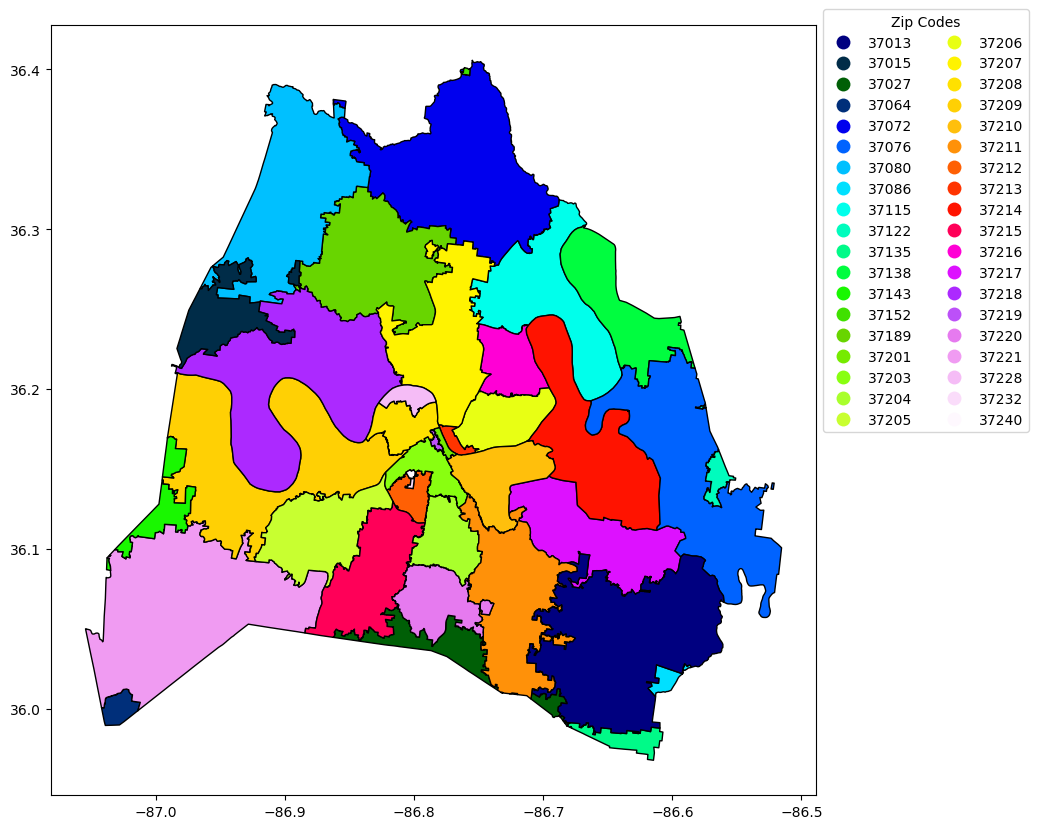

In [19]:
leg_kwds = {'title': 'Zip Codes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'gist_ncar')
plt.show()

In [20]:
zipcodes_int = zipcodes

In [21]:
zipcodes_int['zip'] = zipcodes_int['zip'].astype(int)

# SURVEY CLEANUP

In [22]:
survey = survey.sort_values(['ZIP Code', 'Period'])
for index, row in survey.iterrows():
    if row['Quality of Life'] == 'Very Satisfied':
        survey.loc[index, 'quality_of_life'] = '5'
    elif row['Quality of Life'] == 'Satisfied':
        survey.loc[index, 'quality_of_life'] = '4'
    elif row['Quality of Life'] == 'Neutral':
        survey.loc[index, 'quality_of_life'] = '3'
    elif row['Quality of Life'] == 'Dissatisfied':
        survey.loc[index, 'quality_of_life'] = '2'
    elif row['Quality of Life'] == 'Very Dissatisfied':
        survey.loc[index, 'quality_of_life'] = '1'
    else:
        survey.loc[index, 'quality_of_life'] = ''

In [23]:
for index, row in survey.iterrows():
    if row['Overall Feeling of Safety'] == 'Very Satisfied':
        survey.loc[index, 'overall_feeling_of_safety'] = '5'
    elif row['Overall Feeling of Safety'] == 'Satisfied':
        survey.loc[index, 'overall_feeling_of_safety'] = '4'
    elif row['Overall Feeling of Safety'] == 'Neutral':
        survey.loc[index, 'overall_feeling_of_safety'] = '3'
    elif row['Overall Feeling of Safety'] == 'Dissatisfied':
        survey.loc[index, 'overall_feeling_of_safety'] = '2'
    elif row['Overall Feeling of Safety'] == 'Very Dissatisfied':
        survey.loc[index, 'overall_feeling_of_safety'] = '1'
    else:
        survey.loc[index, 'overall_feeling_of_safety'] = ''

In [24]:
for index, row in survey.iterrows():
    if row['Neighborhood Safety'] == 'Very Satisfied':
        survey.loc[index, 'neighborhood_safety'] = '5'
    elif row['Neighborhood Safety'] == 'Satisfied':
        survey.loc[index, 'neighborhood_safety'] = '4'
    elif row['Neighborhood Safety'] == 'Neutral':
        survey.loc[index, 'neighborhood_safety'] = '3'
    elif row['Neighborhood Safety'] == 'Dissatisfied':
        survey.loc[index, 'neighborhood_safety'] = '2'
    elif row['Neighborhood Safety'] == 'Very Dissatisfied':
        survey.loc[index, 'neighborhood_safety'] = '1'
    else:
        survey.loc[index, 'neighborhood_safety'] = ''

In [25]:
for index, row in survey.iterrows():
    if row['Crime Prevention'] == 'Very Satisfied':
        survey.loc[index, 'crime_prevention'] = '5'
    elif row['Crime Prevention'] == 'Satisfied':
        survey.loc[index, 'crime_prevention'] = '4'
    elif row['Crime Prevention'] == 'Neutral':
        survey.loc[index, 'crime_prevention'] = '3'
    elif row['Crime Prevention'] == 'Dissatisfied':
        survey.loc[index, 'crime_prevention'] = '2'
    elif row['Crime Prevention'] == 'Very Dissatisfied':
        survey.loc[index, 'crime_prevention'] = '1'
    else:
        survey.loc[index, 'crime_prevention'] = ''

In [26]:
for index, row in survey.iterrows():
    if row['Neighborhood Appearance'] == 'Very Satisfied':
        survey.loc[index, 'neighborhood_appearance'] = '5'
    elif row['Neighborhood Appearance'] == 'Satisfied':
        survey.loc[index, 'neighborhood_appearance'] = '4'
    elif row['Neighborhood Appearance'] == 'Neutral':
        survey.loc[index, 'neighborhood_appearance'] = '3'
    elif row['Neighborhood Appearance'] == 'Dissatisfied':
        survey.loc[index, 'neighborhood_appearance'] = '2'
    elif row['Neighborhood Appearance'] == 'Very Dissatisfied':
        survey.loc[index, 'neighborhood_appearance'] = '1'
    else:
        survey.loc[index, 'neighborhood_appearance'] = ''

In [27]:
for index, row in survey.iterrows():
    if row['Police - Overall'] == 'Very Satisfied':
        survey.loc[index, 'police_overall'] = '5'
    elif row['Police - Overall'] == 'Satisfied':
        survey.loc[index, 'police_overall'] = '4'
    elif row['Police - Overall'] == 'Neutral':
        survey.loc[index, 'police_overall'] = '3'
    elif row['Police - Overall'] == 'Dissatisfied':
        survey.loc[index, 'police_overall'] = '2'
    elif row['Police - Overall'] == 'Very Dissatisfied':
        survey.loc[index, 'police_overall'] = '1'
    else:
        survey.loc[index, 'police_overall'] = ''

In [28]:
for index, row in survey.iterrows():
    if row['Public Library'] == 'Very Satisfied':
        survey.loc[index, 'public_library'] = '5'
    elif row['Public Library'] == 'Satisfied':
        survey.loc[index, 'public_library'] = '4'
    elif row['Public Library'] == 'Neutral':
        survey.loc[index, 'public_library'] = '3'
    elif row['Public Library'] == 'Dissatisfied':
        survey.loc[index, 'public_library'] = '2'
    elif row['Public Library'] == 'Very Dissatisfied':
        survey.loc[index, 'public_library'] = '1'
    else:
        survey.loc[index, 'public_library'] = ''

In [29]:
for index, row in survey.iterrows():
    if row['Public Education'] == 'Very Satisfied':
        survey.loc[index, 'public_education'] = '5'
    elif row['Public Education'] == 'Satisfied':
        survey.loc[index, 'public_education'] = '4'
    elif row['Public Education'] == 'Neutral':
        survey.loc[index, 'public_education'] = '3'
    elif row['Public Education'] == 'Dissatisfied':
        survey.loc[index, 'public_education'] = '2'
    elif row['Public Education'] == 'Very Dissatisfied':
        survey.loc[index, 'public_education'] = '1'
    else:
        survey.loc[index, 'public_education'] = ''

In [30]:
for index, row in survey.iterrows():
    if row['Metro-provided Arts and Culture - Overall'] == 'Very Satisfied':
        survey.loc[index, 'arts_and_culture'] = '5'
    elif row['Metro-provided Arts and Culture - Overall'] == 'Satisfied':
        survey.loc[index, 'arts_and_culture'] = '4'
    elif row['Metro-provided Arts and Culture - Overall'] == 'Neutral':
        survey.loc[index, 'arts_and_culture'] = '3'
    elif row['Metro-provided Arts and Culture - Overall'] == 'Dissatisfied':
        survey.loc[index, 'arts_and_culture'] = '2'
    elif row['Metro-provided Arts and Culture - Overall'] == 'Very Dissatisfied':
        survey.loc[index, 'arts_and_culture'] = '1'
    else:
        survey.loc[index, 'arts_and_culture'] = ''

In [31]:
for index, row in survey.iterrows():
    if row['Affordable Housing - Overall'] == 'Very Satisfied':
        survey.loc[index, 'affordable_housing'] = '5'
    elif row['Affordable Housing - Overall'] == 'Satisfied':
        survey.loc[index, 'affordable_housing'] = '4'
    elif row['Affordable Housing - Overall'] == 'Neutral':
        survey.loc[index, 'affordable_housing'] = '3'
    elif row['Affordable Housing - Overall'] == 'Dissatisfied':
        survey.loc[index, 'affordable_housing'] = '2'
    elif row['Affordable Housing - Overall'] == 'Very Dissatisfied':
        survey.loc[index, 'affordable_housing'] = '1'
    else:
        survey.loc[index, 'affordable_housing'] = ''

In [32]:
survey = survey[['Period', 'ZIP Code', 'Service District','Own or Rent', 'Race / Ethnicity - White', 'Race / Ethnicity - Black', 'Race / Ethnicity - Hispanic', 
        'Race / Ethnicity - Asian or Pacific Islander', 'Race / Ethnicity - Native American or Alaskan Native','Race / Ethnicity - Other', 
        'Race / Ethnicity - Other Definition', 'Total Annual Household Income','Age', 'Gender Identity', 'Education Attained','quality_of_life', 
        'neighborhood_appearance', 'neighborhood_safety', 'overall_feeling_of_safety', 'crime_prevention', 'police_overall','public_library', 
        'public_education', 'arts_and_culture', 'affordable_housing']]

In [33]:
survey['Period'] = survey['Period'].str[:4]

In [34]:
survey_average = survey[['ZIP Code','quality_of_life', 'neighborhood_appearance', 'neighborhood_safety', 'overall_feeling_of_safety', 'crime_prevention', 'police_overall',
                 'public_library', 'public_education', 'arts_and_culture', 'affordable_housing']]

# QUALITY OF LIFE MAP

In [35]:
quality_of_life_average = survey_average[['ZIP Code', 'quality_of_life']]
quality_of_life_average =quality_of_life_average.loc[(quality_of_life_average.quality_of_life == '1')|
(quality_of_life_average.quality_of_life == '2')|(quality_of_life_average.quality_of_life == '3')|
(quality_of_life_average.quality_of_life == '4')|(quality_of_life_average.quality_of_life == '5')] 
quality_of_life_average = quality_of_life_average.astype(int)
quality_of_life_average = quality_of_life_average.groupby('ZIP Code')['quality_of_life'].mean().to_frame(name='Quality of Life')
qol_map = pd.merge(zipcodes, quality_of_life_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

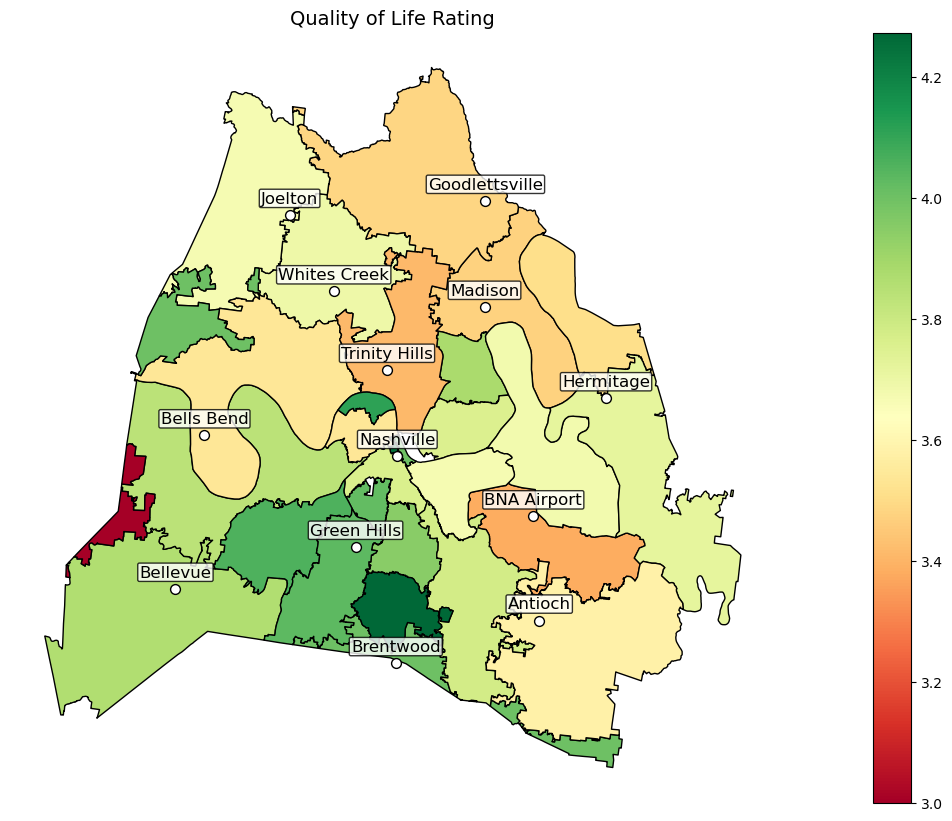

In [36]:
ax = qol_map.plot(column = 'Quality of Life', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Quality of Life Rating', fontsize = 14)
ax.axis('off')
plt.savefig('quality_of_life.jpeg', format='jpeg', dpi=300);

# OVERALL SAFETY MAP

In [37]:
overall_feeling_of_safety_average = survey_average[['ZIP Code', 'overall_feeling_of_safety']]
overall_feeling_of_safety_average = overall_feeling_of_safety_average.loc[(overall_feeling_of_safety_average.overall_feeling_of_safety == '1')|
(overall_feeling_of_safety_average.overall_feeling_of_safety == '2')|(overall_feeling_of_safety_average.overall_feeling_of_safety == '3')|
(overall_feeling_of_safety_average.overall_feeling_of_safety == '4')|(overall_feeling_of_safety_average.overall_feeling_of_safety == '5')] 
overall_feeling_of_safety_average = overall_feeling_of_safety_average.astype(int)
overall_feeling_of_safety_average = overall_feeling_of_safety_average.groupby('ZIP Code')['overall_feeling_of_safety'].mean().to_frame(name='Feeling of Safety')
safety_map = pd.merge(zipcodes, overall_feeling_of_safety_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

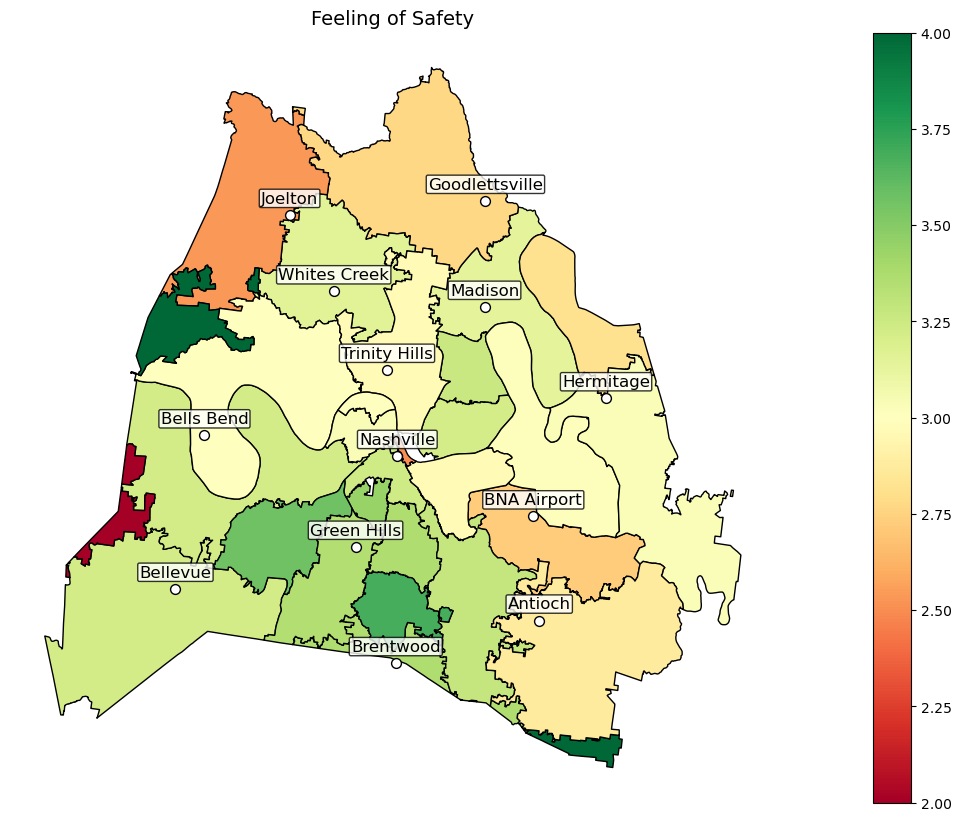

In [38]:
ax = safety_map.plot(column = 'Feeling of Safety', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Feeling of Safety', fontsize = 14)
ax.axis('off')
plt.savefig('safety.jpeg', format='jpeg', dpi=300);

# NEIGHBORHOOD SAFETY MAP

In [39]:
neighborhood_safety_average = survey_average[['ZIP Code', 'neighborhood_safety']]
neighborhood_safety_average = neighborhood_safety_average.loc[(neighborhood_safety_average.neighborhood_safety == '1')|
(neighborhood_safety_average.neighborhood_safety == '2')|(neighborhood_safety_average.neighborhood_safety == '3')|
(neighborhood_safety_average.neighborhood_safety == '4')|(neighborhood_safety_average.neighborhood_safety == '5')] 
neighborhood_safety_average = neighborhood_safety_average.astype(int)
neighborhood_safety_average = neighborhood_safety_average.groupby('ZIP Code')['neighborhood_safety'].mean().to_frame(name='Neighborhood Safety')
neighborhood_safety_map = pd.merge(zipcodes, neighborhood_safety_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

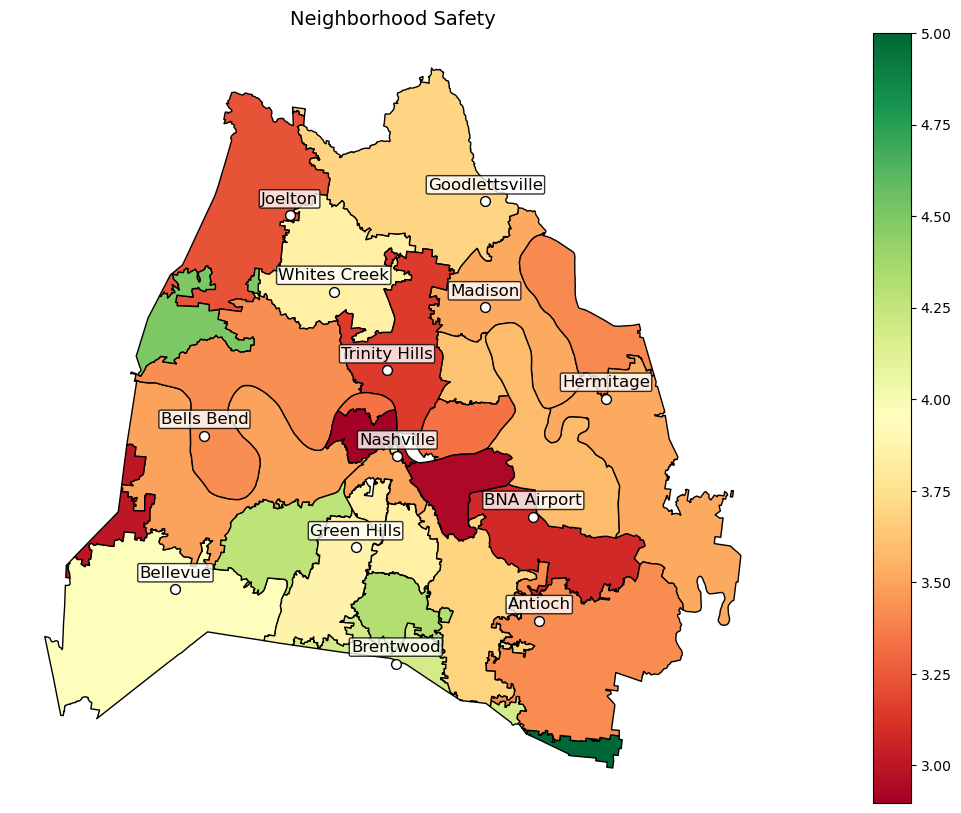

In [40]:
ax = neighborhood_safety_map.plot(column = 'Neighborhood Safety', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Neighborhood Safety', fontsize = 14)
ax.axis('off')
plt.savefig('neighborhood_safety.jpeg', format='jpeg', dpi=300);

# CRIME PREVENTION MAP

In [41]:
crime_prevention_average = survey_average[['ZIP Code', 'crime_prevention']]
crime_prevention_average = crime_prevention_average.loc[(crime_prevention_average.crime_prevention == '1')|
(crime_prevention_average.crime_prevention == '2')|(crime_prevention_average.crime_prevention == '3')|
(crime_prevention_average.crime_prevention == '4')|(crime_prevention_average.crime_prevention == '5')] 
crime_prevention_average = crime_prevention_average.astype(int)
crime_prevention_average = crime_prevention_average.groupby('ZIP Code')['crime_prevention'].mean().to_frame(name='Crime Prevention')
crime_prevention_map = pd.merge(zipcodes, crime_prevention_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

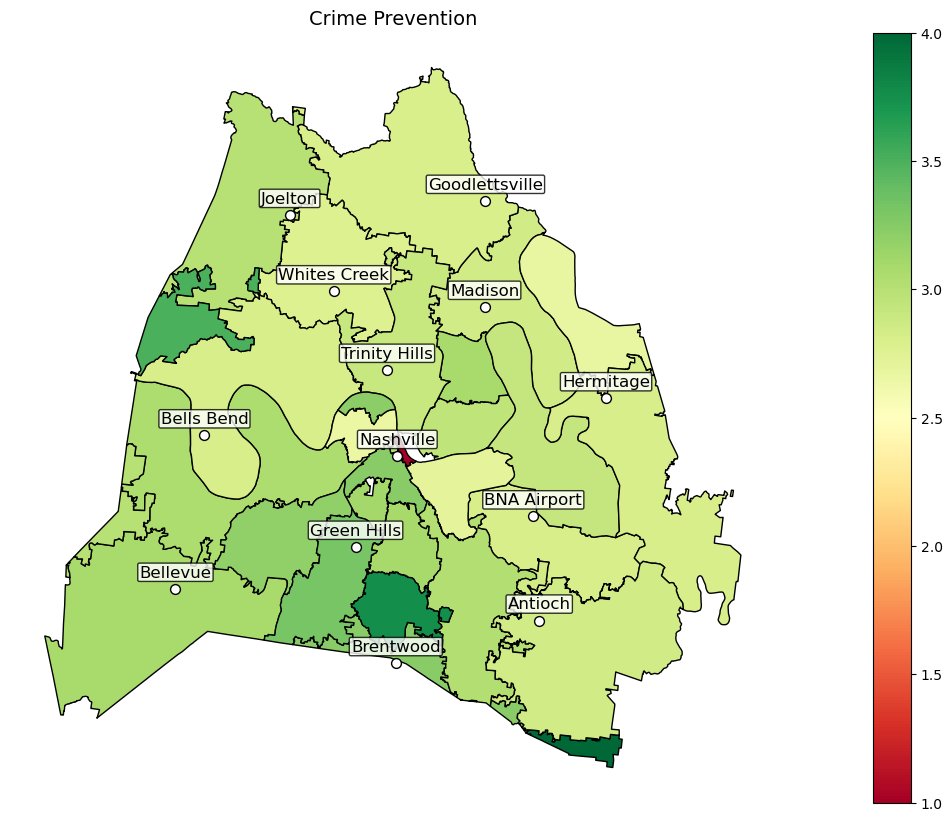

In [42]:
ax = crime_prevention_map.plot(column = 'Crime Prevention', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Crime Prevention', fontsize = 14)
ax.axis('off')
plt.savefig('crime_prevention.jpeg', format='jpeg', dpi=300);

# NEIGHBORHOOD APPEARANCE MAP

In [43]:
neighborhood_appearance_average = survey_average[['ZIP Code', 'neighborhood_appearance']]
neighborhood_appearance_average = neighborhood_appearance_average.loc[(neighborhood_appearance_average.neighborhood_appearance == '1')|
(neighborhood_appearance_average.neighborhood_appearance == '2')|(neighborhood_appearance_average.neighborhood_appearance == '3')|
(neighborhood_appearance_average.neighborhood_appearance == '4')|(neighborhood_appearance_average.neighborhood_appearance == '5')] 
neighborhood_appearance_average = neighborhood_appearance_average.astype(int)
neighborhood_appearance_average = neighborhood_appearance_average.groupby('ZIP Code')['neighborhood_appearance'].mean().to_frame(name='Neighborhood Appearance')
neighborhood_appearance_map = pd.merge(zipcodes, neighborhood_appearance_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

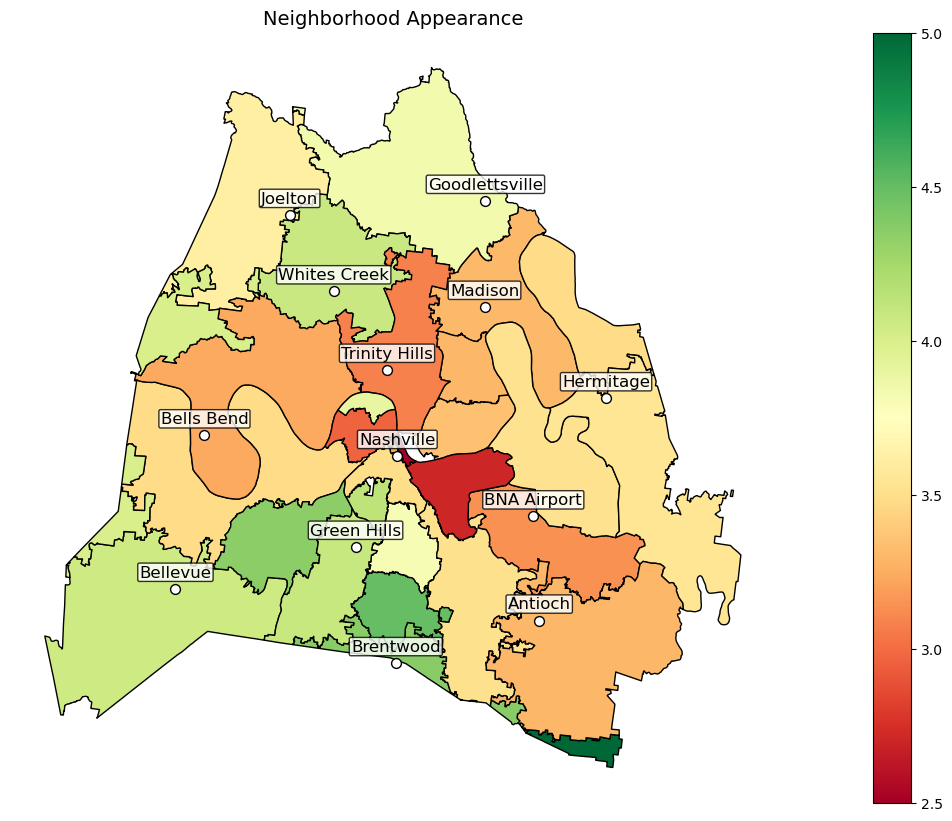

In [44]:
ax = neighborhood_appearance_map.plot(column = 'Neighborhood Appearance', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Neighborhood Appearance', fontsize = 14)
ax.axis('off')
plt.savefig('neighborhood_appearance.jpeg', format='jpeg', dpi=300);

# POLICE OVERALL

In [45]:
police_overall_average = survey_average[['ZIP Code', 'police_overall']]
police_overall_average = police_overall_average.loc[(police_overall_average.police_overall == '1')|
(police_overall_average.police_overall == '2')|(police_overall_average.police_overall == '3')|
(police_overall_average.police_overall == '4')|(police_overall_average.police_overall == '5')] 
police_overall_average = police_overall_average.astype(int)
police_overall_average = police_overall_average.groupby('ZIP Code')['police_overall'].mean().to_frame(name='Police')
police_overall_map = pd.merge(zipcodes, police_overall_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

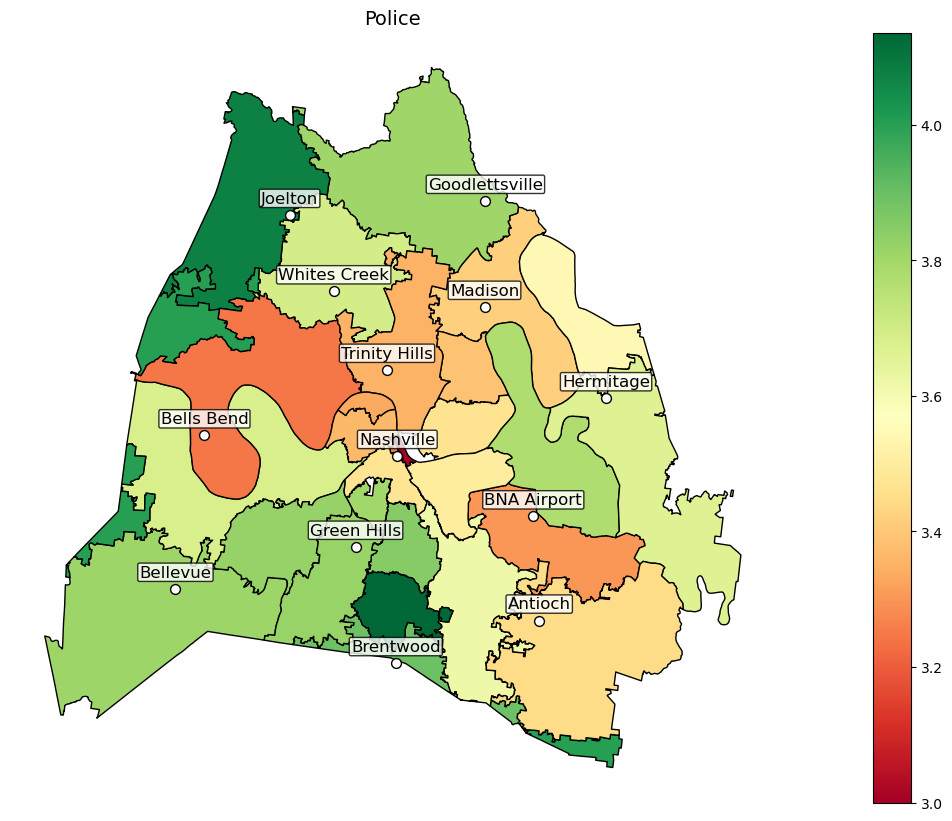

In [46]:
ax = police_overall_map.plot(column = 'Police', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Police', fontsize = 14)
ax.axis('off')
plt.savefig('police.jpeg', format='jpeg', dpi=300);

# PUBLIC EDUCATION MAP

In [47]:
public_education_average = survey_average[['ZIP Code', 'public_education']]
public_education_average = public_education_average.loc[(public_education_average.public_education == '1')|
(public_education_average.public_education == '2')|(public_education_average.public_education == '3')|
(public_education_average.public_education == '4')|(public_education_average.public_education == '5')] 
public_education_average = public_education_average.astype(int)
public_education_average = public_education_average.groupby('ZIP Code')['public_education'].mean().to_frame(name='Public Education')
public_education_map = pd.merge(zipcodes, public_education_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

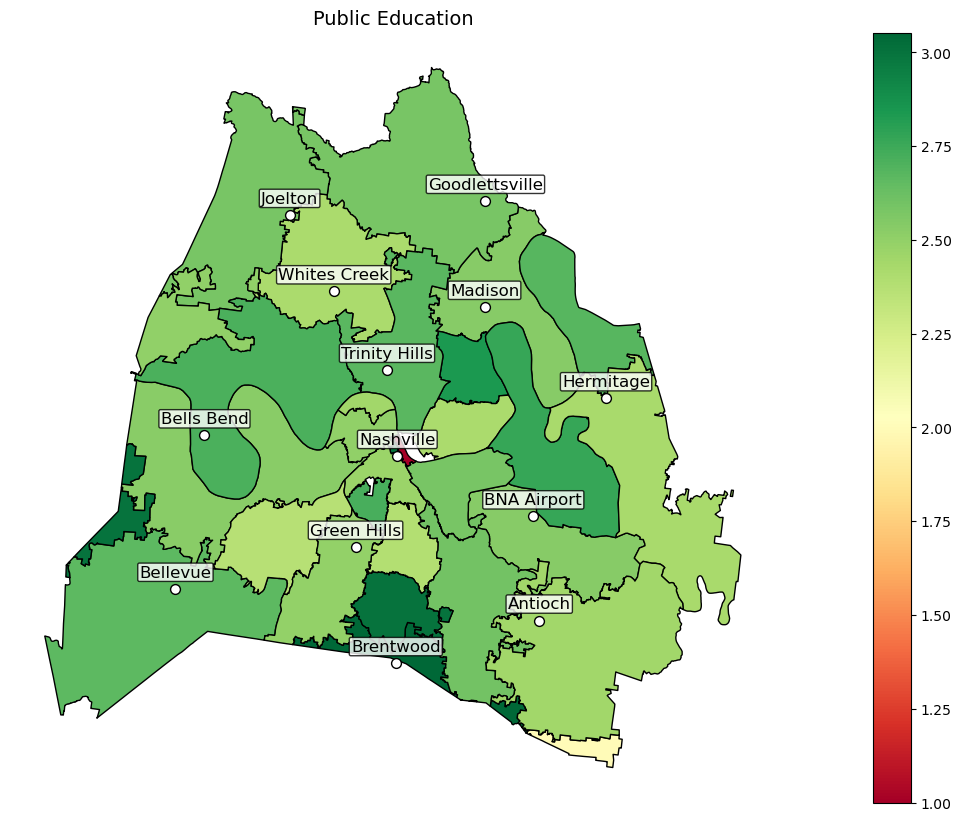

In [48]:
ax = public_education_map.plot(column = 'Public Education', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Public Education', fontsize = 14)
ax.axis('off')
plt.savefig('public_education.jpeg', format='jpeg', dpi=300);

# PUBLIC LIBRARIES MAP

In [49]:
public_library_average = survey_average[['ZIP Code', 'public_library']]
public_library_average = public_library_average.loc[(public_library_average.public_library == '1')|
(public_library_average.public_library == '2')|(public_library_average.public_library == '3')|
(public_library_average.public_library == '4')|(public_library_average.public_library == '5')] 
public_library_average = public_library_average.astype(int)
public_library_average = public_library_average.groupby('ZIP Code')['public_library'].mean().to_frame(name='Public Libraries')
public_library_map = pd.merge(zipcodes, public_library_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

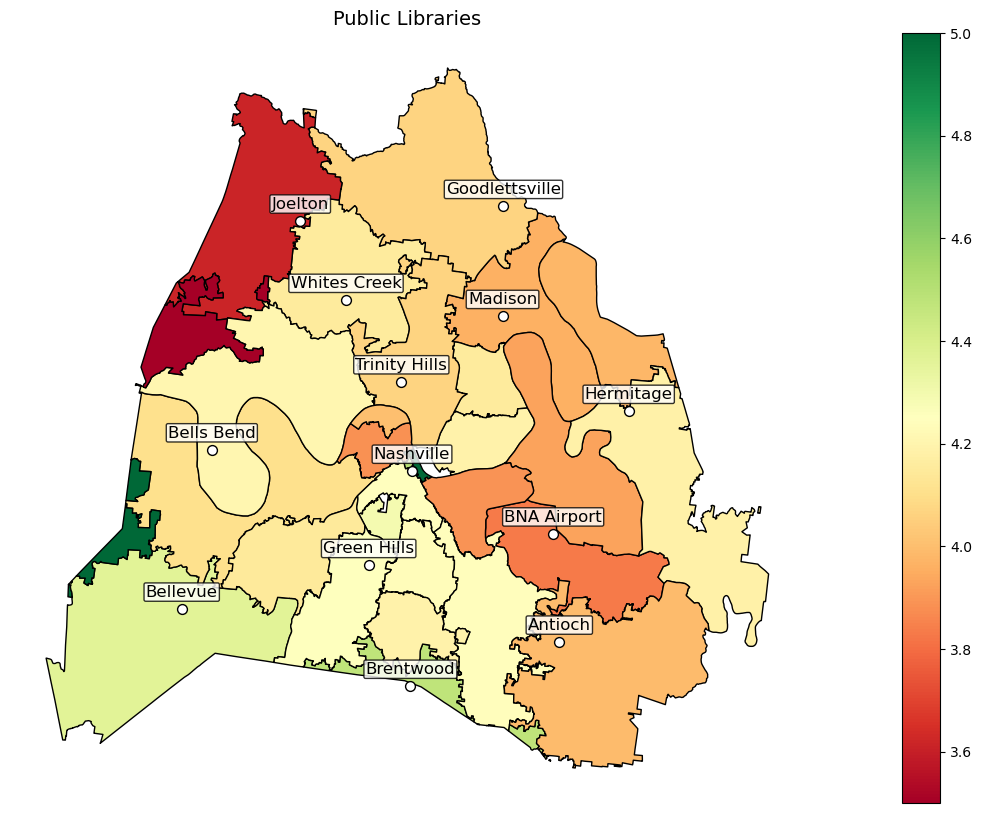

In [50]:
ax = public_library_map.plot(column = 'Public Libraries', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Public Libraries', fontsize = 14)
ax.axis('off')
plt.savefig('public_libraries.jpeg', format='jpeg', dpi=300);

# ARTS AND CULTURE MAP

In [51]:
arts_and_culture_average = survey_average[['ZIP Code', 'arts_and_culture']]
arts_and_culture_average = arts_and_culture_average.loc[(arts_and_culture_average.arts_and_culture == '1')|
(arts_and_culture_average.arts_and_culture == '2')|(arts_and_culture_average.arts_and_culture == '3')|
(arts_and_culture_average.arts_and_culture == '4')|(arts_and_culture_average.arts_and_culture == '5')] 
arts_and_culture_average = arts_and_culture_average.astype(int)
arts_and_culture_average = arts_and_culture_average.groupby('ZIP Code')['arts_and_culture'].mean().to_frame(name='Arts and Culture')
arts_and_culture_map = pd.merge(zipcodes, arts_and_culture_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

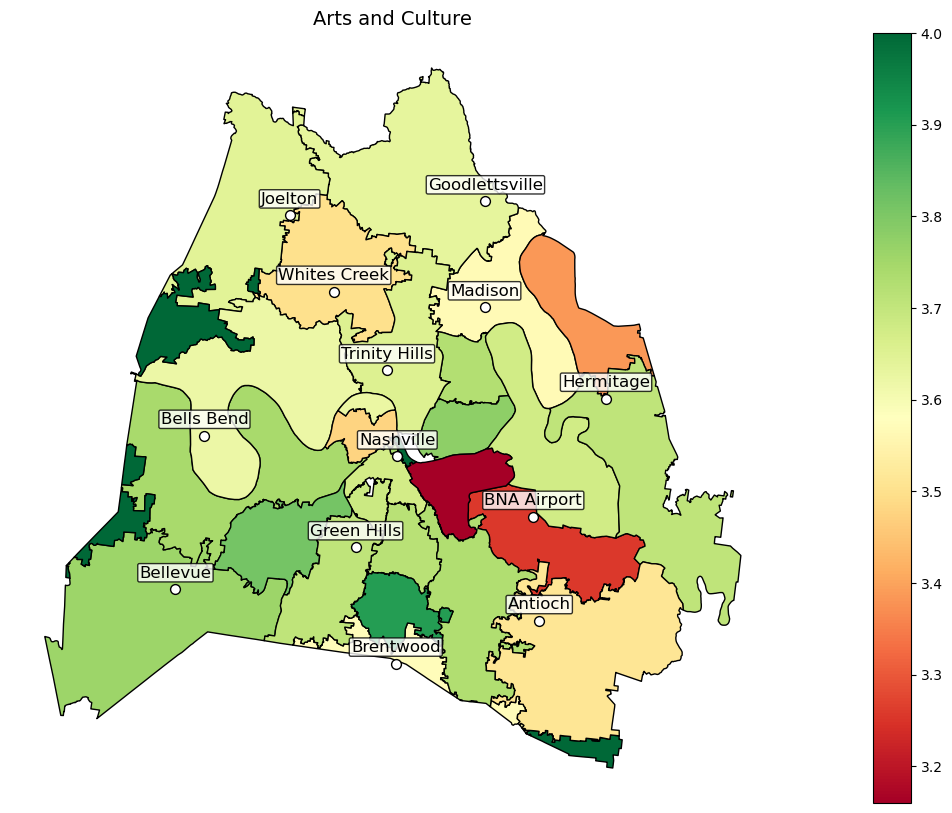

In [52]:
ax = arts_and_culture_map.plot(column = 'Arts and Culture', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Arts and Culture', fontsize = 14)
ax.axis('off')
plt.savefig('arts_and_culture.jpeg', format='jpeg', dpi=300);

# AFFORDABLE HOUSING MAP

In [53]:
affordable_housing_average = survey_average[['ZIP Code', 'affordable_housing']]
affordable_housing_average = affordable_housing_average.loc[(affordable_housing_average.affordable_housing == '1')|
(affordable_housing_average.affordable_housing == '2')|(affordable_housing_average.affordable_housing == '3')|
(affordable_housing_average.affordable_housing == '4')|(affordable_housing_average.affordable_housing == '5')] 
affordable_housing_average = affordable_housing_average.astype(int)
affordable_housing_average = affordable_housing_average.groupby('ZIP Code')['affordable_housing'].mean().to_frame(name='Affordable Housing')
affordable_housing_map = pd.merge(zipcodes, affordable_housing_average, left_on = 'zip', right_on = 'ZIP Code', how='left')

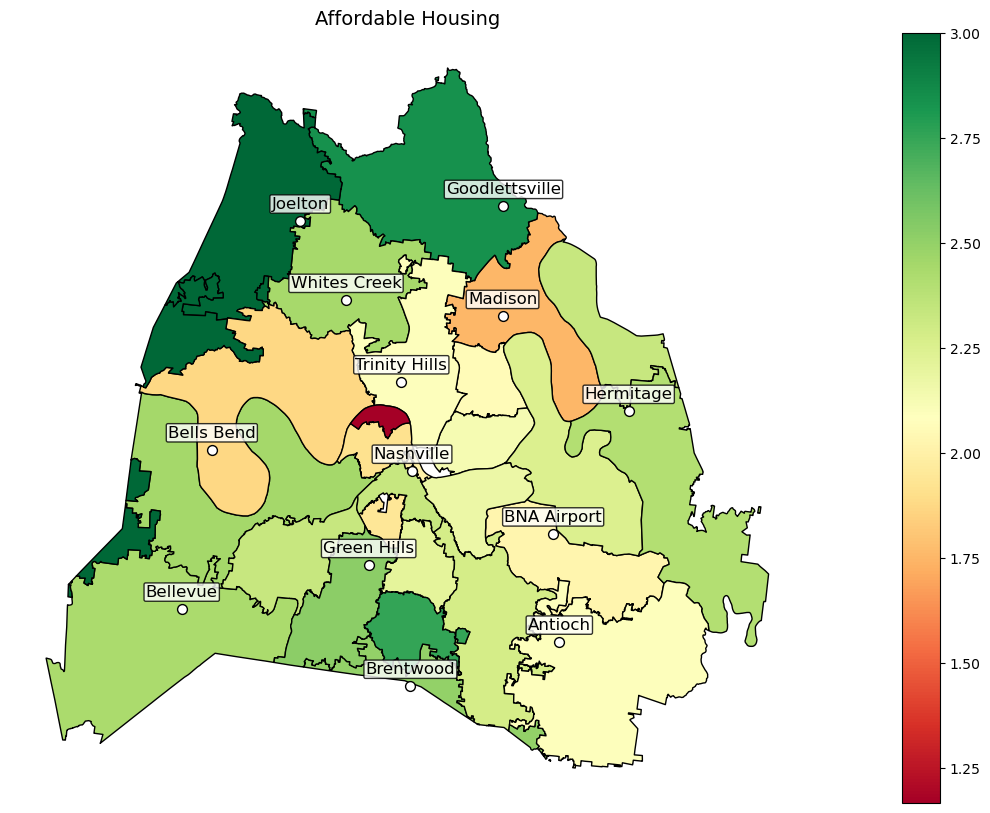

In [54]:
ax = affordable_housing_map.plot(column = 'Affordable Housing', figsize=(25, 10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Affordable Housing', fontsize = 14)
ax.axis('off')
plt.savefig('affordable_housing.jpeg', format='jpeg', dpi=300);

# HOUSING MAP

In [55]:
housing_map = housing.groupby('zip_code')['average_price'].sum().to_frame().reset_index()
housing_map = pd.merge(zipcodes, housing, left_on = 'zip', right_on = 'zip_code', how='left')

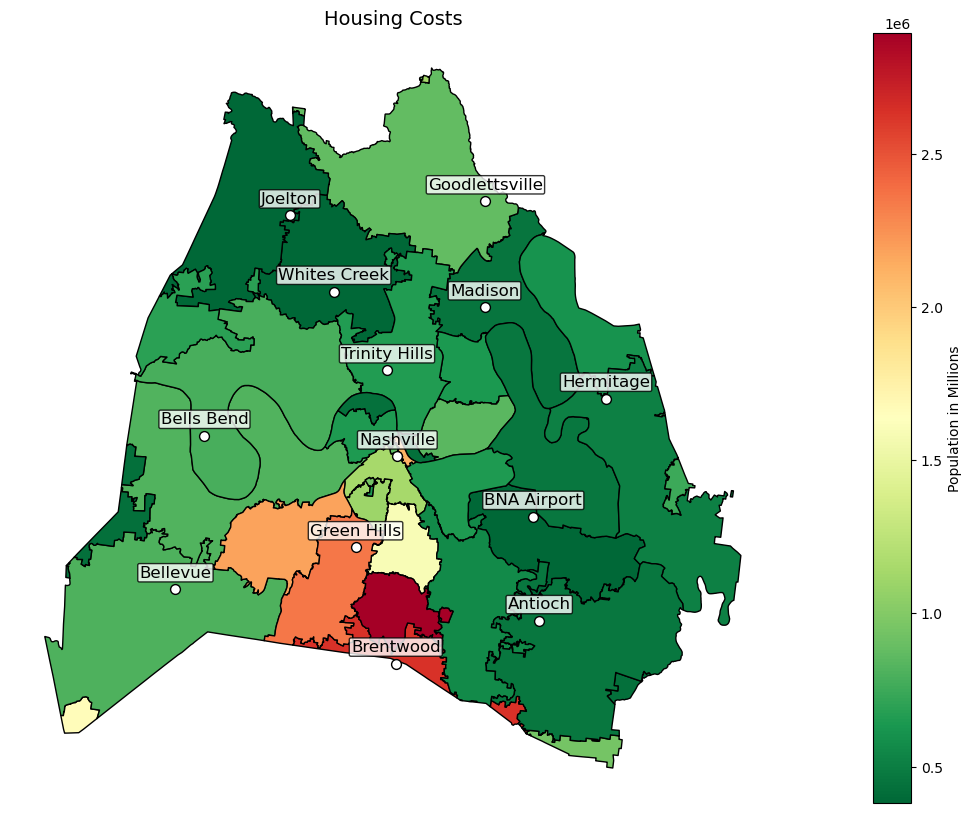

In [56]:
ax = housing_map.plot(column = 'average_price', figsize=(25,10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn_r', legend_kwds = {'label': "Population in Millions"})
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Housing Costs', fontsize = 14)
ax.axis('off')
plt.savefig('real_housing_costs.jpeg', format='jpeg', dpi=300);

# Crime Map

In [57]:
crime = crime[['Latitude', 'Longitude', 'Offense_Description', 'Incident_Location', 'ZIP_Code', 'Incident_Occurred']]

In [58]:
crime['Incident_Occurred'] = crime['Incident_Occurred'].str[:4]

In [59]:
crime = crime.dropna()
crime['ZIP_Code'] = crime['ZIP_Code'].astype(int)
crime_count = crime.value_counts(['ZIP_Code'])
crime_map = pd.merge(zipcodes, crime_count, left_on = 'zip', right_on = 'ZIP_Code', how='left')

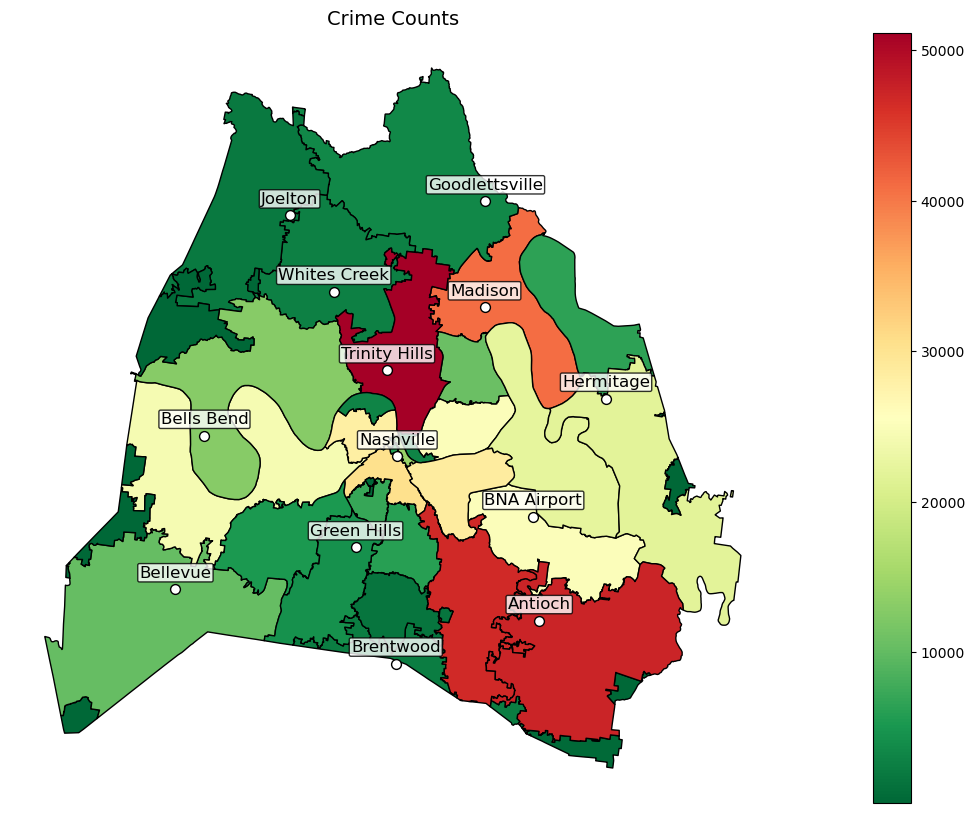

In [60]:
ax = crime_map.plot(column = 'count', figsize=(25,10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn_r')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Crime Counts', fontsize = 14)
ax.axis('off')
plt.savefig('crime_counts.jpeg', format='jpeg', dpi=300);

# SCHOOLS MAP

In [61]:
for index, row in schools.iterrows():
    if row['Public School'] == 'A+':
        schools.loc[index, 'public_school'] = '5'
    elif row['Public School'] == 'A-':
        schools.loc[index, 'public_school'] = '4.5'
    elif row['Public School'] == 'A':
        schools.loc[index, 'public_school'] = '4'
    elif row['Public School'] == 'B+':
        schools.loc[index, 'public_school'] = '3.5'
    elif row['Public School'] == 'B':
        schools.loc[index, 'public_school'] = '3'
    elif row['Public School'] == 'B-':
        schools.loc[index, 'public_school'] = '2.5'
    elif row['Public School'] == 'C+':
        schools.loc[index, 'public_school'] = '2'
    elif row['Public School'] == 'C':
        schools.loc[index, 'public_school'] = '1.5'
    elif row['Public School'] == 'C-':
        schools.loc[index, 'public_school'] = '1'
    else:
        schools.loc[index, 'public_school'] = ''
schools_map = pd.merge(zipcodes, schools, left_on = 'zip', right_on = 'zip_code', how='left')

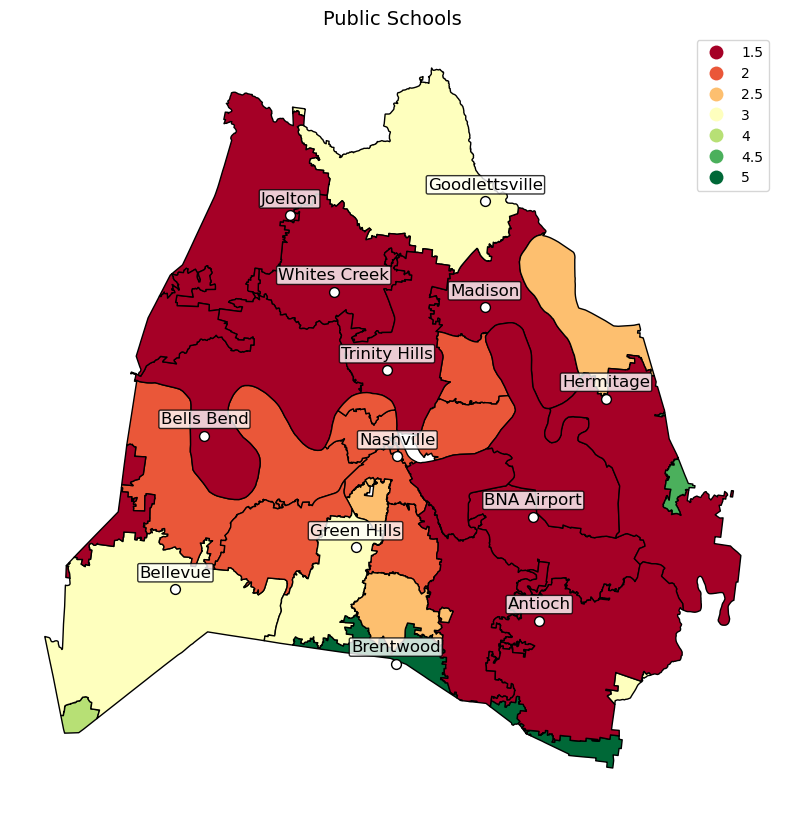

In [62]:
ax = schools_map.plot(column = 'public_school', figsize=(25,10),
                  edgecolor = 'black', legend = True,
                   cmap = 'RdYlGn')
ax.scatter(nashville[0], nashville[1], color='white', s=50, label='Nashville', edgecolor='black')
ax.text(nashville[0], nashville[1] + 0.0075, 'Nashville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(antioch[0], antioch[1], color='white', s=50, label='Antioch', edgecolor='black')
ax.text(antioch[0], antioch[1] + 0.0075, 'Antioch', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(brentwood[0], brentwood[1], color='white', s=50, label='Brentwood', edgecolor='black')
ax.text(brentwood[0], brentwood[1] + 0.0075, "Brentwood", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(airport[0], airport[1], color='white', s=50, label='BNA Airport', edgecolor='black')
ax.text(airport[0], airport[1] + 0.0075, 'BNA Airport', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bellevue[0], bellevue[1], color='white', s=50, label='Bellevue', edgecolor='black')
ax.text(bellevue[0], bellevue[1] + 0.0075, "Bellevue", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(green_hills[0], green_hills[1], color='white', s=50, label='Green Hills', edgecolor='black')
ax.text(green_hills[0], green_hills[1] + 0.0075, "Green Hills", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(madison[0], madison[1], color='white', s=50, label='Madison', edgecolor='black')
ax.text(madison[0], madison[1] + 0.0075, "Madison", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(joelton[0], joelton[1], color='white', s=50, label='Joelton', edgecolor='black')
ax.text(joelton[0], joelton[1] + 0.0075, 'Joelton', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(hermitage[0], hermitage[1], color='white', s=50, label='Hermitage', edgecolor='black')
ax.text(hermitage[0], hermitage[1] + 0.0075, 'Hermitage', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(bells_bend[0], bells_bend[1], color='white', s=50, label='Bells Bend', edgecolor='black')
ax.text(bells_bend[0], bells_bend[1] + 0.0075, "Bells Bend", fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(goodlettsville[0], goodlettsville[1], color='white', s=50, label='Goodlettsville', edgecolor='black')
ax.text(goodlettsville[0], goodlettsville[1] + 0.0075, 'Goodlettsville', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(whites_creek[0], whites_creek[1], color='white', s=50, label='Whites Creek', edgecolor='black')
ax.text(whites_creek[0], whites_creek[1] + 0.0075, 'Whites Creek', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
ax.scatter(trinity_hills[0], trinity_hills[1], color='white', s=50, label='Trinity Hills', edgecolor='black')
ax.text(trinity_hills[0], trinity_hills[1] + 0.0075, 'Trinity Hills', fontsize=12, color='black', ha='center',
        bbox=dict(boxstyle='round,pad=0.1', edgecolor='black', facecolor='white', alpha=0.8))
plt.title('Public Schools', fontsize = 14)
ax.axis('off')
plt.savefig('public_schools.jpeg', format='jpeg', dpi=300);

In [63]:
crime_count = crime_count.to_frame('Crime Count')

In [88]:
housing = housing.rename(columns = {'zip_code':'ZIP Code'}) 

In [95]:
full_table = pd.merge(quality_of_life_average, overall_feeling_of_safety_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, neighborhood_safety_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, crime_prevention_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, neighborhood_appearance_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, police_overall_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, public_education_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, public_library_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, arts_and_culture_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, affordable_housing_average, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, housing, on = 'ZIP Code', how = 'left')
full_table = pd.merge(full_table, crime_count, left_on = 'ZIP Code', right_on = 'ZIP_Code', how = 'left')
full_table = pd.merge(full_table, schools, left_on = 'ZIP Code', right_on = 'zip_code', how = 'left')
full_table

,ZIP Code,Quality of Life,Feeling of Safety,Neighborhood Safety,Crime Prevention,Neighborhood Appearance,Police,Public Education,Public Libraries,Arts and Culture,...,highest_price,lowest_price,square_footage,area,Crime Count,zip_code,Overall Niche Grade,Public School,Population,public_school
0,37013,3.580460,2.874286,3.420455,2.840237,3.297143,3.447674,2.450000,3.987805,3.512987,...,3500000.0,224900.0,"2,518",Antioch / Cane Ridge,47328.0,37013.0,B,C,99800.0,1.5
1,37015,4.000000,4.000000,4.500000,3.500000,4.000000,4.000000,2.500000,3.500000,4.000000,...,7900000.0,169000.0,"2,230",Ashland City,179.0,37015.0,C+,C,19104.0,1.5
2,37023,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37023.0,C+,B-,1569.0,2.5
3,37027,4.000000,3.363636,4.181818,3.227273,4.363636,3.894737,3.052632,4.476190,3.571429,...,15000000.0,405900.0,"5,267",Brentwood,2236.0,37027.0,A+,A+,62116.0,5
4,37072,3.485714,2.771429,3.694444,2.794118,3.833333,3.805556,2.580645,4.062500,3.633333,...,11500000.0,179900.0,"2,813",Goodlettsville,3420.0,37072.0,B,B,32364.0,3
5,37076,3.718750,3.030928,3.515464,2.808511,3.552083,3.663158,2.426829,4.183908,3.707865,...,1999999.0,195000.0,"2,172",Hermitage,21902.0,37076.0,B+,C,38095.0,1.5
6,37080,3.666667,2.538462,3.230769,3.000000,3.615385,4.076923,2.583333,3.615385,3.642857,...,NaN,NaN,NaN,NaN,1875.0,37080.0,C+,C,7106.0,1.5
7,37115,3.476744,3.137931,3.517241,2.847059,3.306818,3.418605,2.539474,3.962500,3.565789,...,1299999.0,129900.0,"1,778",Madison,40808.0,37115.0,B-,C,41926.0,1.5
8,37116,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,37135,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,NaN,4.000000,...,5000000.0,308900.0,"2,926",Nolensville,216.0,37135.0,A+,A+,22693.0,5


In [96]:
full_table.to_csv('full_table.csv', index=False)